In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
%matplotlib inline

In [28]:
data = pd.read_csv("cleaned_Data.csv")

In [29]:
data.head()

,date,temp,dew_pt,hum,wind_spd,vis,pressure,rain
0,2018-01-01 02:30:00,69,64,80,2.3,1,29.87,0
1,2018-01-01 05:30:00,68,65,87,4.6,1,29.84,0
2,2018-01-01 08:30:00,71,64,71,6.9,1,29.92,0
3,2018-01-01 11:30:00,79,69,64,4.6,2,29.89,0
4,2018-01-01 14:30:00,79,64,51,6.9,2,29.82,0


In [30]:
data.drop(['date'],axis = 1, inplace=True)

In [31]:
data.head()

,temp,dew_pt,hum,wind_spd,vis,pressure,rain
0,69,64,80,2.3,1,29.87,0
1,68,65,87,4.6,1,29.84,0
2,71,64,71,6.9,1,29.92,0
3,79,69,64,4.6,2,29.89,0
4,79,64,51,6.9,2,29.82,0


In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(['rain'] , axis=1), data['rain'], test_size=0.2, random_state=42 )

In [34]:
from sklearn.naive_bayes import GaussianNB

In [35]:
nb = GaussianNB()

In [36]:
nb.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [37]:
ypredict = nb.predict(X_test)

In [38]:
from sklearn.metrics import classification_report

In [39]:
print(classification_report(y_test , ypredict))

              precision    recall  f1-score   support

           0       0.99      0.88      0.93       452
           1       0.30      0.85      0.44        26

   micro avg       0.88      0.88      0.88       478
   macro avg       0.64      0.87      0.69       478
weighted avg       0.95      0.88      0.91       478



In [40]:
from sklearn.preprocessing import StandardScaler

In [41]:
st = StandardScaler()

In [42]:
for i in data.columns:
    if not (i == 'rain'):
        data[i] = st.fit_transform(data[i].values.reshape(-1,1))
    else:
        pass
        

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted

In [43]:
data.head()

,temp,dew_pt,hum,wind_spd,vis,pressure,rain
0,-1.991604,-1.638903,0.159177,-0.615038,-1.195857,0.832830,0
1,-2.150767,-1.494212,0.671033,-0.122837,-1.195857,0.657854,0
2,-1.673278,-1.638903,-0.498923,0.369365,-1.195857,1.124456,0
3,-0.399975,-0.915447,-1.010778,-0.122837,0.816354,0.949480,0
4,-0.399975,-1.638903,-1.961367,0.369365,0.816354,0.541203,0


In [44]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(['rain'] , axis=1), data['rain'], test_size=0.2, random_state=42 )

In [45]:
nb1 = GaussianNB()

In [46]:
nb1.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [47]:
ypredict1 = nb1.predict(X_test)

In [48]:
print(classification_report(y_test, ypredict1))

              precision    recall  f1-score   support

           0       0.99      0.88      0.93       452
           1       0.30      0.85      0.44        26

   micro avg       0.88      0.88      0.88       478
   macro avg       0.64      0.87      0.69       478
weighted avg       0.95      0.88      0.91       478



In [49]:
from sklearn.metrics import confusion_matrix

In [50]:
print(confusion_matrix(y_test , ypredict1))

[[400  52]
 [  4  22]]


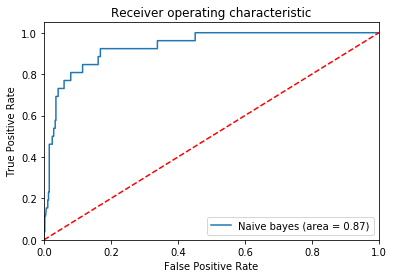

In [56]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, nb1.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, nb1.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Naive bayes (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('GaussianNb ROC Curve')
plt.show()

In [53]:
import pickle as pkl

In [55]:
with open ("gaussian_model.pkl", "wb") as f:
    pkl.dump(nb1 , f)